Does using Data Science will make you choose differently?

# Project Motivation 

In [1]:
ls

 Volume in drive C is OS
 Volume Serial Number is EC45-0D61

 Directory of C:\Users\YU-JUNG CHEN\data science\Proj

02/03/2022  11:10 AM    <DIR>          .
02/03/2022  11:10 AM    <DIR>          ..
02/02/2022  10:03 AM    <DIR>          .ipynb_checkpoints
02/01/2022  04:39 PM            89,502 netflix.csv
02/03/2022  11:10 AM           166,964 Proj 01.ipynb
               2 File(s)        256,466 bytes
               3 Dir(s)  436,512,153,600 bytes free


# 1. Introduction

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [3]:
# read csv file
df = pd.read_csv("netflix.csv")
df

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,NaN,82


# 2. Accessing the data

In [4]:
# checking any nulls and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   ratingDescription  1000 non-null   int64  
 4   release year       1000 non-null   int64  
 5   user rating score  605 non-null    float64
 6   user rating size   1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [5]:
# randomly check data
df.sample(10)

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
323,The Secret Life of the American Teenager,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2013,81.0,80
35,Hyena Road,R,"bloody war violence, language throughout and s...",100,2015,NaN,82
644,The Furchester Hotel,TV-Y,Suitable for all ages.,10,2015,NaN,82
987,Mia and Me,TV-Y,Suitable for all ages.,10,2015,NaN,82
984,The Magic School Bus,TV-Y,Suitable for all ages.,10,1997,81.0,80
344,Sausage Party,R,"strong crude sexual content, pervasive languag...",100,2016,91.0,80
58,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,110,2013,97.0,80
568,Goosebumps,TV-Y7,Suitable for children ages 7 and older,41,1998,88.0,80
416,Person of Interest,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,93.0,80
79,How to Get Away with Murder,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80


In [6]:
df.describe()

,ratingDescription,release year,user rating score,user rating size
count,1000.00000,1000.000000,605.000000,1000.000000
mean,67.36600,2010.335000,84.094215,80.783000
std,30.78561,8.877927,12.344371,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,75.000000,80.000000
50%,60.00000,2015.000000,88.000000,80.000000
75%,90.00000,2016.000000,95.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000


US shows rating: 

1. **G**: general audiences 
2. **PG**: Parental Guidance Suggested
3. **TV-14**: Some Material May Be Inappropriate For Children Under 13. A PG-13 rating is a sterner warning by the Rating Board to parents to determine whether their children under age 13 should view the motion picture, as some material might not be suited for them. 
4. **TV-MA**: shows that is intend for adults"

In [7]:
# check out the number of user rating score per rating
df.rating.value_counts()

TV-14       234
PG          170
TV-MA       148
G           138
TV-Y         68
TV-PG        59
TV-G         52
TV-Y7-FV     44
TV-Y7        38
R            19
PG-13        15
NR           14
UR            1
Name: rating, dtype: int64

The majority of the rating is TV-14, PG, and TV-MA. G is the last one

In [8]:
df.columns=['title', 'rating', 'ratingLevel', 'ratingDescription', 'releaseYear', 'userRatingScore', 'userRatingSize']
df

,title,rating,ratingLevel,ratingDescription,releaseYear,userRatingScore,userRatingSize
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,NaN,82


In [9]:
df.releaseYear.value_counts()

2016    292
2015    109
2017    100
2014     58
2013     57
2012     45
1997     28
1998     26
2008     22
2011     21
2010     20
2009     20
2006     19
1999     19
2007     18
2000     17
2003     17
2002     15
2005     14
1993     14
2001     11
2004      8
1990      7
1995      6
1994      6
1982      6
1991      5
1986      4
1976      4
1940      3
1987      2
1989      2
1978      2
1992      2
1996      1
Name: releaseYear, dtype: int64

In [10]:
# check columns ratingDescription, releaseYear, userRatingScore, userRatingSize has NaN or not
print('Does rating description has NaN: ', df.ratingDescription.isnull().values.any())
print('Does release year has NaN: ', df.releaseYear.isnull().values.any())
print('Does user Rating Score has NaN: ', df.userRatingScore.isnull().values.any())
print('Does user Rating Size has NaN: ', df.userRatingSize.isnull().values.any())

Does rating description has NaN:  False
Does release year has NaN:  False
Does user Rating Score has NaN:  True
Does user Rating Size has NaN:  False


**Quality**
* "title", "ratingLevel" columns don't add anything meaningful to the analysis, could drop
* Missing values in userRatingScore column

# 3. Cleaning the data

First step in cleaning process: make a copy of the DataFrame and fix the issues listed in Quality

In [11]:
# make a copy 
df_1 = df.copy()

## 3.1 **Quality**
**"title", "ratingLevel" columns don't add anything meaningful to the analysis, could drop**

In [12]:
df_1 = df_1.drop(['title', 'ratingLevel'], axis=1)
df_1

,rating,ratingDescription,releaseYear,userRatingScore,userRatingSize
0,PG-13,80,2004,82.0,80
1,R,100,2006,NaN,82
2,TV-14,90,2016,98.0,80
3,TV-14,90,2008,98.0,80
4,TV-PG,70,2014,94.0,80
...,...,...,...,...,...
995,PG,60,2016,97.0,80
996,PG,60,2016,NaN,81
997,TV-G,35,2003,NaN,82
998,TV-G,35,2013,NaN,82


In [13]:
# check how many NaN values in userRatingScore
df_1.userRatingScore.isnull().sum(axis = 0)

395

In [14]:
df_1.describe()

,ratingDescription,releaseYear,userRatingScore,userRatingSize
count,1000.00000,1000.000000,605.000000,1000.000000
mean,67.36600,2010.335000,84.094215,80.783000
std,30.78561,8.877927,12.344371,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,75.000000,80.000000
50%,60.00000,2015.000000,88.000000,80.000000
75%,90.00000,2016.000000,95.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000




There are 395 NaN values in 1000 data, it is dangerous to simply remove those NaN value in userRatingScore. Since it could change the metric "mean, or median" values and deduce the wrong information. 

According to the article "What's the best way to handle NaN values?" (https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc), the author suggests 3 methods:

1. Impute them with specific values
2. Impute with special metrics, ie mean or median
3. Impute using a method: MICE or KNN

Let's experiment using mean, median and MICE nad KNN

In [15]:
# method 1: replace NaN with mean

df_1_mean = df_1.copy()
mean_value = df_1_mean['userRatingScore'].mean()
print('userRatingScore is: ', mean_value)
df_1_mean['userRatingScore'].fillna(mean_value, inplace=True)

df_1_mean.describe()

userRatingScore is:  84.09421487603306


,ratingDescription,releaseYear,userRatingScore,userRatingSize
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,67.36600,2010.335000,84.094215,80.783000
std,30.78561,8.877927,9.598529,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,83.000000,80.000000
50%,60.00000,2015.000000,84.094215,80.000000
75%,90.00000,2016.000000,91.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000


In [16]:
# method 2: replace NaN with median

df_1_median = df_1.copy()
median_value = df_1_median['userRatingScore'].median()
print('userRatingScore is: ', median_value)
df_1_median['userRatingScore'].fillna(median_value, inplace=True)

df_1_median.describe()

userRatingScore is:  88.0


,ratingDescription,releaseYear,userRatingScore,userRatingSize
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,67.36600,2010.335000,85.637000,80.783000
std,30.78561,8.877927,9.786777,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,83.000000,80.000000
50%,60.00000,2015.000000,88.000000,80.000000
75%,90.00000,2016.000000,91.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000


In [17]:
# method 3: Impyute  
#(https://pythonrepo.com/repo/eltonlaw-impyute-python-science-and-data-analysis)

from sklearn.impute import KNNImputer

df_1_knn = df_1.copy()
imputer = KNNImputer(n_neighbors=5)  # n_neighbors default = 5
imputer.fit_transform(df_1_knn['userRatingScore'])
print('userRatingScore is: ', )

df_1_knn.describe()

ValueError: Expected 2D array, got 1D array instead:
array=[82. nan 98. 98. 94. 95. 97. 91. 98. 96. 98. 95. 77. 88. nan nan 96. 80.
 74. 97. 81. nan nan 57. 95. 98. 94. 98. nan nan 84. nan nan 83. nan nan
 82. nan nan 94. nan 99. 89. nan 92. nan nan nan nan nan nan 97. 98. 98.
 62. 96. 94. 95. 97. 94. 92. 91. 98. 98. 98. 81. 90. 98. 96. 97. 91. 90.
 98. nan 80. 83. 97. 98. 90. 95. 80. nan 98. nan 90. 96. 97. 79. 98. 82.
 91. 93. 97. 94. nan 89. 92. 93. 61. 78. nan nan nan 97. 66. 75. 91. 63.
 94. 98. 97. 62. 91. nan nan 92. nan nan 98. nan nan 90. 95. 80. 74. nan
 nan nan nan nan nan 94. 68. nan nan 82. nan nan 94. nan nan 99. 92. 93.
 nan nan nan 71. 94. nan nan nan 88. 59. nan 73. nan 98. 63. 83. nan nan
 nan 90. nan 80. nan 86. 91. 74. 79. nan 69. nan 94. nan 68. nan nan 58.
 96. nan nan nan nan 61. nan 94. nan 99. nan nan 62. nan nan nan 94. 78.
 nan nan nan 66. 82. 94. nan 91. 79. 55. 62. 91. nan 73. 58. nan nan 80.
 nan nan nan nan 90. nan 80. 81. nan 86. 63. 74. 69. nan nan nan 94. 68.
 nan nan 69. 89. nan nan nan 99. nan 92. 93. 79. nan nan 61. nan 82. 68.
 86. 56. 77. 64. 58. 89. 95. 56. 97. 81. nan 98. 98. 62. 96. 94. 92. 91.
 98. 98. 98. nan 81. 89. 91. 79. 85. 96. 97. 83. 91. 81. 92. nan 62. 80.
 93. 79. 90. 95. 90. 98. 77. 99. 84. nan 61. 94. 82. 86. nan 78. 64. 58.
 89. 56. 97. 97. 97. 98. 82. 97. 96. 94. 95. 94. 92. 91. 98. 98. nan 81.
 90. 61. 91. 88. 79. 96. 97. 91. 84. 92. 77. 63. 98. 80. 93. 74. 94. 95.
 97. 98. 91. 69. 94. 99. nan 61. 98. 85. nan 98. 89. 98. 96. 92. 91. 81.
 nan 91. 90. 93. 91. 96. 73. 97. 81. 98. 92. 92. nan 83. 96. 73. 79. 74.
 97. nan 56. 96. 83. nan 90. nan 95. 84. 91. nan nan nan 88. 68. 96. 94.
 99. nan 62. nan 97. 95. 86. 98. 89. 98. 97. 85. 97. 98. 93. 69. 96. 91.
 97. 84. 93. 92. 68. 95. 88. 92. 96. nan nan 92. nan 61. 77. 89. 66. 96.
 nan 98. nan nan 85. 95. 95. 94. nan nan 57. 81. 88. 84. 86. 57. nan nan
 97. 98. 97. 89. 98. 62. 96. 94. 94. 91. 98. 98. 79. 79. 93. 95. 91. 96.
 73. 97. 91. 84. 93. 98. 92. 88. 95. 92. 98. nan 80. 83. 61. 96. nan nan
 70. 81. nan 81. 94. 88. 84. 79. 82. nan 94. 99. 57. 62. 84. 86. 92. nan
 57. 95. nan nan nan nan 74. nan 93. 89. 77. 66. nan 73. 71. nan nan nan
 nan nan nan nan nan nan nan nan nan nan 71. nan nan nan nan nan nan 83.
 nan nan 97. 92. nan nan nan nan 61. nan 84. 67. 86. 83. 57. 74. 77. 66.
 nan nan 73. nan nan nan nan nan 67. nan 88. nan nan nan 74. 74. nan nan
 nan nan 71. 78. nan nan nan nan nan nan nan nan nan nan nan 83. nan nan
 56. nan nan nan nan 80. 86. 83. 95. 95. 86. 95. 82. nan nan 91. 92. nan
 94. 91. 95. 74. 89. 68. 88. nan 85. 81. 67. 94. nan nan 88. nan 70. 93.
 72. nan 90. 92. 97. 97. nan 72. nan 92. 96. 98. nan nan nan 77. nan nan
 nan 61. 86. 80. 95. 67. 80. 95. 95. 64. 68. 85. 92. 85. nan 94. 91. 74.
 68. 56. nan nan 81. 88. nan nan 81. 67. 82. 85. 70. nan nan nan 71. nan
 96. 88. 70. 93. nan 71. nan 97. 97. nan 72. 92. 98. nan 77. 61. 81. 96.
 86. 93. 95. 95. 86. 95. 75. 92. 55. 94. 91. 95. 74. 68. 88. 65. 81. nan
 81. 82. 85. nan 94. 70. nan nan 96. 88. 70. 93. nan 84. 92. 61. 97. 97.
 72. nan 92. 96. 97. nan 93. 96. 77. nan 80. 65. 81. 93. 80. nan 81. nan
 95. 91. nan 64. 95. 61. 67. nan nan nan 64. nan nan nan nan nan nan 83.
 57. nan nan nan nan nan nan nan nan 81. 72. nan nan nan 57. nan nan nan
 nan 84. nan 96. nan nan nan 65. 83. 93. 67. 67. 86. 70. nan 64. nan nan
 nan nan nan nan 83. nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan 70. 93. nan nan nan nan nan nan
 nan nan nan 65. 81. 93. 80. nan 81. nan 95. 91. nan 64. 95. 61. 67. nan
 nan nan 64. nan nan nan nan nan nan 83. 57. nan nan nan nan nan nan nan
 nan 81. 72. nan nan nan 57. nan nan nan nan 84. nan 96. nan nan nan 65.
 81. 96. 93. 80. nan 91. nan 61. 58. nan nan 96. 70. nan 64. nan nan 79.
 nan nan 68. nan nan nan nan nan nan 83. 85. nan nan 91. 57. nan nan nan
 nan 72. nan nan nan 57. nan nan nan nan nan nan nan 80. 81. nan 83. 93.
 80. nan nan 91. nan 67. 58. nan 71. nan 64. nan 93. 74. nan nan 68. nan
 70. 80. 83. nan nan nan nan 74. nan nan nan nan 81. nan 74. nan 70. nan
 nan 72. nan nan nan 97. nan nan nan 80.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [18]:
# method 4: MICE
# https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_1_mice = df_1.copy()
imputer = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
imputer.fit(df_1_mice['userRatingScore'])

NameError: name 'BayesianRidge' is not defined

In [19]:
# fill the nan values with mean

df_2 = df_1.copy()
median_value = df_2['userRatingScore'].median()
print('userRatingScore is: ', median_value)
df_2['userRatingScore'].fillna(median_value, inplace=True)

df_2.describe()

userRatingScore is:  88.0


,ratingDescription,releaseYear,userRatingScore,userRatingSize
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,67.36600,2010.335000,85.637000,80.783000
std,30.78561,8.877927,9.786777,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,83.000000,80.000000
50%,60.00000,2015.000000,88.000000,80.000000
75%,90.00000,2016.000000,91.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000


In [20]:
df_2.describe()

,ratingDescription,releaseYear,userRatingScore,userRatingSize
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,67.36600,2010.335000,85.637000,80.783000
std,30.78561,8.877927,9.786777,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,83.000000,80.000000
50%,60.00000,2015.000000,88.000000,80.000000
75%,90.00000,2016.000000,91.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000


In [21]:
# check how many NaN values in userRatingScore
df_2.userRatingScore.isnull().sum(axis = 0)

0

# 4. Data Analysis and Visualization

## 4.1 Which Rating gets the highest User Rating Score



In [22]:
df_3 = df.copy()
df_3.head()

,title,rating,ratingLevel,ratingDescription,releaseYear,userRatingScore,userRatingSize
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [23]:
# # plot the distribution of rating
# import seaborn as sns

# fig, ax = plt.subplots(1, 2, figsize=(19, 5))

# g1 = sns.countplot(data=df_3, x='rating', palette="Set2", ax=ax[0]); 
# g1.set_title("Count of Each Rating Types (Original)")
# g1.set_xlabel("Type (Rating)")
# g1.set_ylabel("Total Count")

# g2 = sns.countplot(data=df_2, x='rating', palette="Set2", ax=ax[1]);
# g2.set_title("Count of Each Rating Types (NaN Values Replaced)")
# g2.set_xlabel("Type (Rating)")
# g2.set_ylabel("Total Count")

# fig.show()

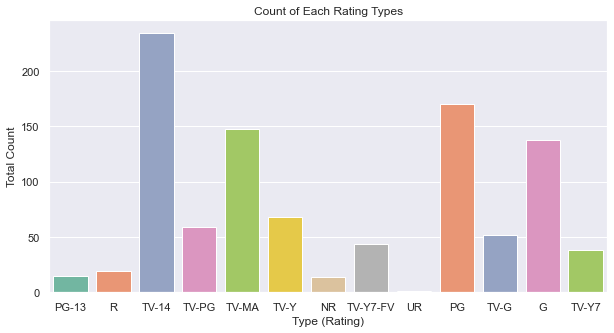

In [24]:
plt.figure(figsize=(10,5))
g = sns.countplot(data=df_3, x='rating', palette="Set2");
plt.title("Count of Each Rating Types")
plt.xlabel("Type (Rating)")
plt.ylabel("Total Count")
plt.show()

Most rating types people watch on Netflix is TV-14, followed by PG and TV-MA. 

**Netflix Film Ratings**

Now we explore the User Rating Scores base on rating types, the ordering of the plot will base on the user rating size. 

In [25]:
df_2

,rating,ratingDescription,releaseYear,userRatingScore,userRatingSize
0,PG-13,80,2004,82.0,80
1,R,100,2006,88.0,82
2,TV-14,90,2016,98.0,80
3,TV-14,90,2008,98.0,80
4,TV-PG,70,2014,94.0,80
...,...,...,...,...,...
995,PG,60,2016,97.0,80
996,PG,60,2016,88.0,81
997,TV-G,35,2003,88.0,82
998,TV-G,35,2013,88.0,82


In [26]:
year = df_2['releaseYear'].value_counts().to_frame().reset_index().rename(columns={'index':'year', 'releaseYear':'count'})
year

,year,count
0,2016,292
1,2015,109
2,2017,100
3,2014,58
4,2013,57
5,2012,45
6,1997,28
7,1998,26
8,2008,22
9,2011,21


In [27]:
year2 = df_2[['rating', 'releaseYear']]
year2


,rating,releaseYear
0,PG-13,2004
1,R,2006
2,TV-14,2016
3,TV-14,2008
4,TV-PG,2014
...,...,...
995,PG,2016
996,PG,2016
997,TV-G,2003
998,TV-G,2013


In [28]:
tv14_year = year2[year2['rating']=='TV-14'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
pg_year = year2[year2['rating']=='PG'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
g_year = year2[year2['rating']=='G'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
tvma_year = year2[year2['rating']=='TV-MA'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})

In [29]:
tv14_year.rename(columns={0:'count'}, inplace=True)
pg_year.rename(columns={0:'count'}, inplace=True)
g_year.rename(columns={0:'count'}, inplace=True)
tvma_year.rename(columns={0:'count'}, inplace=True)
tvma_year

,rating,releaseYear,count
0,TV-MA,2017,65
1,TV-MA,2016,57
2,TV-MA,2015,12
3,TV-MA,2013,6
4,TV-MA,2014,4
5,TV-MA,2012,1
6,TV-MA,2010,1
7,TV-MA,2009,1
8,TV-MA,2007,1


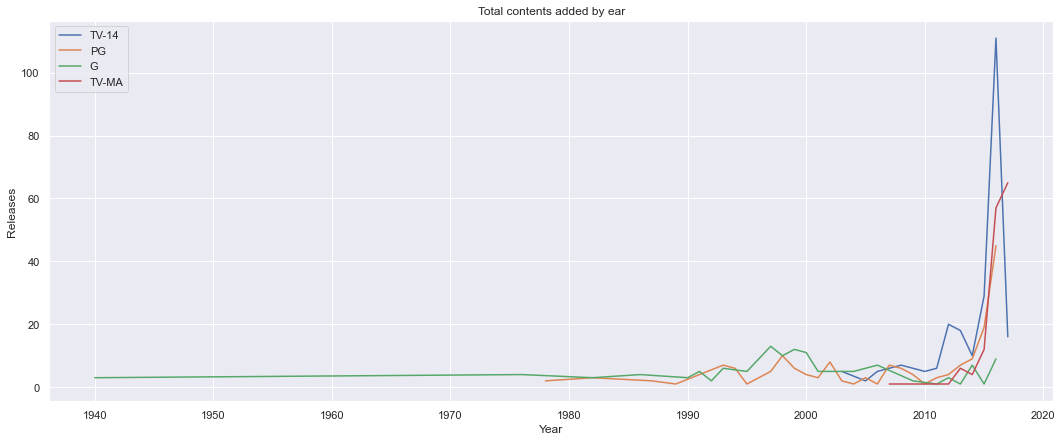

In [30]:
fig, ax = plt.subplots(figsize=(18,7))
sns.lineplot(data=tv14_year, x='releaseYear', y='count')
sns.lineplot(data=pg_year, x='releaseYear', y='count')
sns.lineplot(data=g_year, x='releaseYear', y='count')
sns.lineplot(data=tvma_year, x='releaseYear', y='count')
#x.set_xticks(np.arange(2012,2022,1))
plt.title("Total contents added by ear")
plt.legend(['TV-14', 'PG', 'G', 'TV-MA'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

As we can see from the above plot, there are far more TV-14 rating contents than any other types. For the year 2019, the stats is not complete so the data might be misleading. 



## Inferences and Conclusion

We can conclude that rating "TV-14" is the most popular content in Netflix since 2010 when streaming media was about the take over the tradition media. And according to this website (https://rating-system.fandom.com/wiki/TV-14#:~:text=As%20of%20August%2019%2C%202021%2C%20there%20are%20over,States%29.%20%28list%29%20Content%20Description%20D%3A%20Intensely%20Suggestive%20Dialogue), TV-14 contains violence, sexual references and strong language and it's the rating that appears the most on prime time. Therefore, we can conclude that Netflix continues to produce more and more content that will belong to this rating. 


## References 
1. https://github.com/allenkong221/netflix-titles-dataset/blob/main/netflix-movies-and-tv-shows-eda.ipynb
2. https://github.com/stephanieirvine/Udacity-Data-Scientist-Nanodegree/tree/main/Project%201